In [1]:
#套件載入
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from sklearn.manifold import TSNE
from mpld3 import plugins
%matplotlib inline

In [2]:
#資料讀取
df=pd.read_csv('TSNE_dataset.csv')
df

,Class,Drink,Rank,Amount,Count
0,A,7Up,7,"(100, 200)",300
1,B,Sprite,6,"(200, 10)",150
2,C,Pepsi,5,"(200, 10)",150
3,D,Coke,4,"(400, 100)",300
4,E,Cappuccino,3,"(800, 10)",150
5,F,Espresso,2,"(800, 10)",150
6,G,Latte,1,"(900, 400)",300


In [3]:
#詞嵌入轉換相似度矩陣
word2vec=gensim.models.KeyedVectors.load_word2vec_format(r'GoogleNews-vectors-negative300.bin', binary=True)
distance=[]
name=['Coke','Pepsi','7Up','Sprite','Latte','Espresso','Cappuccino']
for i in name:
    distance.append(word2vec[i])
similarity=pd.DataFrame(columns=name) 
value=[]
for j in range(7):
    for k in range(7):
        value.append(word2vec.similarity(name[j],name[k]))
    similarity[name[j]]=value
    value=[]
print(similarity)

       Coke     Pepsi       7Up    Sprite     Latte  Espresso  Cappuccino
0  1.000000  0.616062  0.491677  0.570642  0.277807  0.199250    0.140735
1  0.616062  1.000000  0.460241  0.540599  0.177285  0.114409    0.180004
2  0.491677  0.460241  1.000000  0.539839  0.255465  0.193757    0.174528
3  0.570642  0.540599  0.539839  1.000000  0.269688  0.239021    0.253089
4  0.277807  0.177285  0.255465  0.269688  1.000000  0.548601    0.396419
5  0.199250  0.114409  0.193757  0.239021  0.548601  1.000000    0.447165
6  0.140735  0.180004  0.174528  0.253089  0.396419  0.447165    1.000000


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


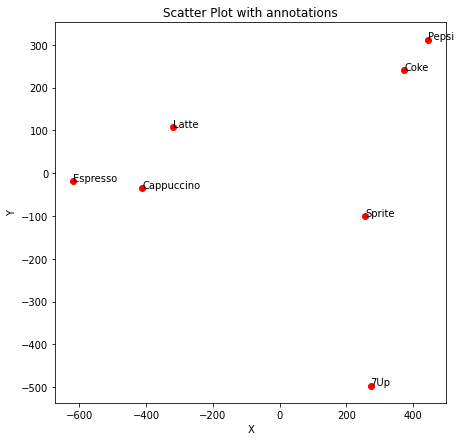

In [4]:
#透過相似度矩陣降維
model=TSNE(n_components=3,init='pca',n_iter=1000)
ds=model.fit_transform(similarity)
plt.figure(figsize=(7,7))
plt.scatter(ds[:,0],ds[:,2],color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations")
for i,label in enumerate(similarity.columns):
        plt.annotate(label,(model.embedding_[i,0],model.embedding_[i,2]))
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


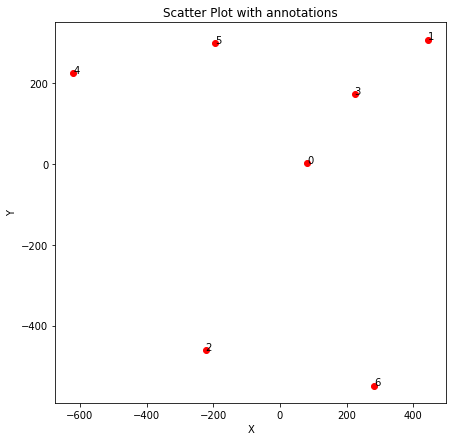

In [5]:
#透過1-of-k轉換後降維
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
file=onehotencoder.fit_transform(df[['Drink']]).toarray()
file=pd.DataFrame(file)
file
model=TSNE(n_components=3,init='pca',n_iter=1000)
ds=model.fit_transform(file)
plt.figure(figsize=(7,7))
plt.scatter(ds[:,0],ds[:,2],color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations")
for i,label in enumerate(file.columns):
        plt.annotate(label,(model.embedding_[i,0],model.embedding_[i,2]))
plt.show()